<a href="https://colab.research.google.com/github/arshadkumar/Prodigy-tasks/blob/main/Task02_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.info()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:

df_clean = df.copy()
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
df_clean.drop(columns=['Cabin'], inplace=True)
df_clean.drop(columns=['Ticket'], inplace=True)
df_clean.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


/tmp/ipython-input-3456578965.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df_clean, palette="pastel")


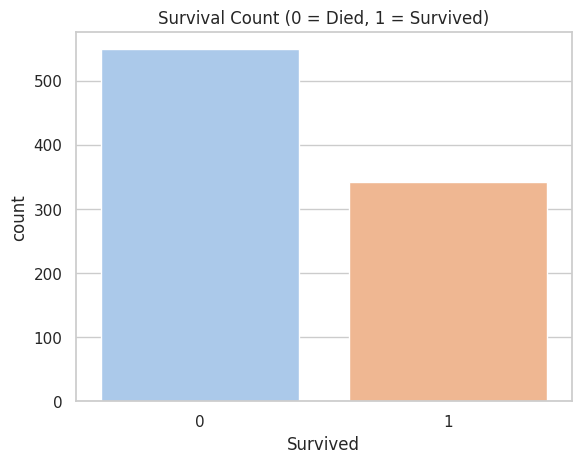

In [ ]:
sns.countplot(x="Survived", data=df_clean, palette="pastel")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


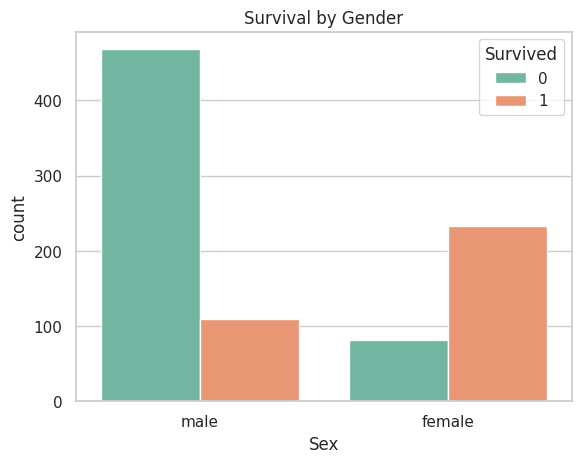

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df_clean, palette="Set2")
plt.title("Survival by Gender")
plt.show()


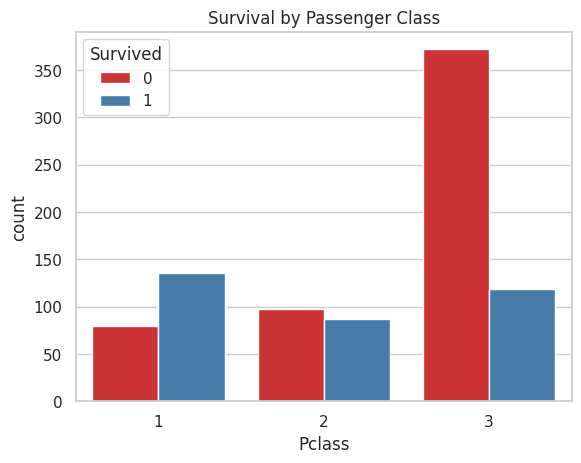

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df_clean, palette="Set1")
plt.title("Survival by Passenger Class")
plt.show()


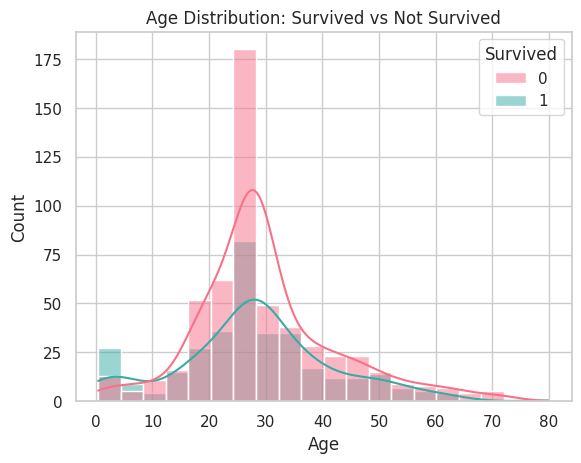

In [ ]:
sns.histplot(data=df_clean, x="Age", hue="Survived", kde=True, bins=20, palette="husl")
plt.title("Age Distribution: Survived vs Not Survived")
plt.show()


/tmp/ipython-input-3346852040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived_Label", data=df_clean, palette="pastel")


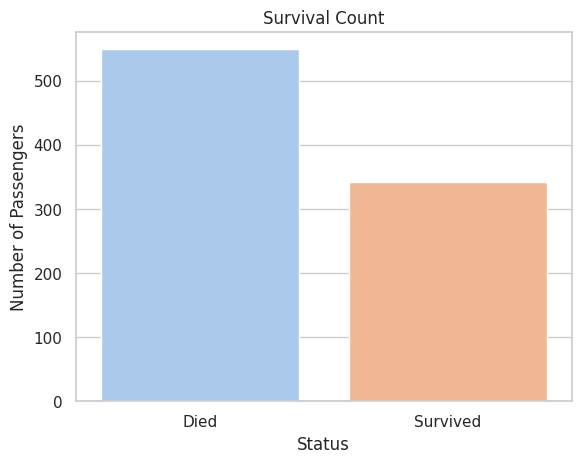

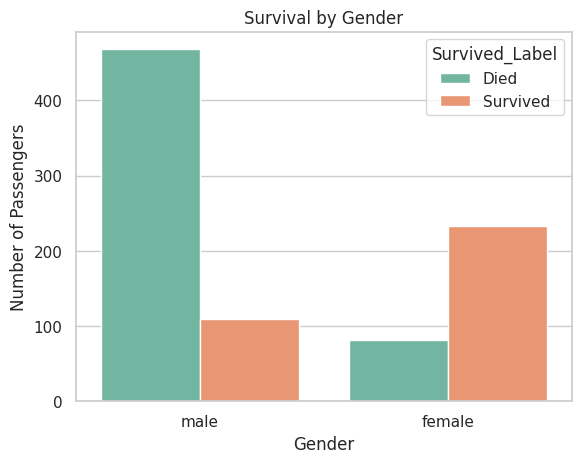

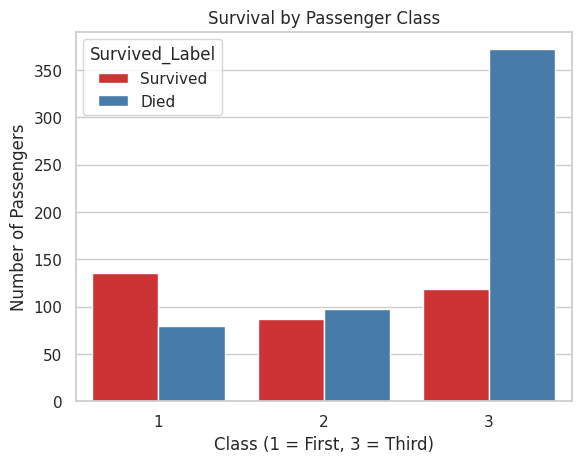

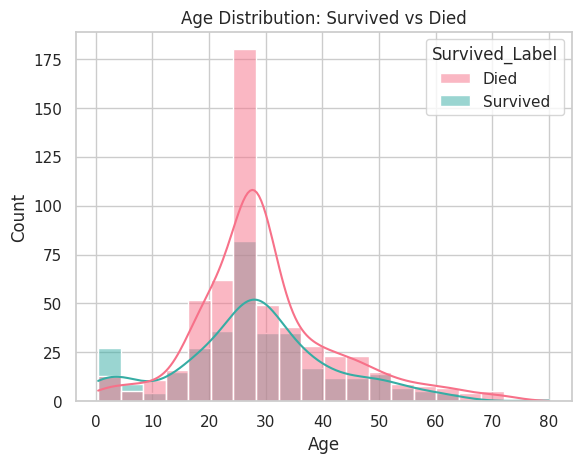

In [ ]:

df_clean['Survived_Label'] = df_clean['Survived'].map({0: "Died", 1: "Survived"})
sns.countplot(x="Survived_Label", data=df_clean, palette="pastel")
plt.title("Survival Count")
plt.xlabel("Status")
plt.ylabel("Number of Passengers")
plt.show()
sns.countplot(x="Sex", hue="Survived_Label", data=df_clean, palette="Set2")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()
sns.countplot(x="Pclass", hue="Survived_Label", data=df_clean, palette="Set1")
plt.title("Survival by Passenger Class")
plt.xlabel("Class (1 = First, 3 = Third)")
plt.ylabel("Number of Passengers")
plt.show()
sns.histplot(data=df_clean, x="Age", hue="Survived_Label", kde=True, bins=20, palette="husl")
plt.title("Age Distribution: Survived vs Died")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:

survival_stats = df_clean['Survived_Label'].value_counts(normalize=True) * 100
print(survival_stats)


Survived_Label
Died        61.616162
Survived    38.383838
Name: proportion, dtype: float64
